<a href="https://colab.research.google.com/github/defender-777/mnist-digit-classifier/blob/main/digit-classifier-mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform to Tensor + Normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 39.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.96MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.83MB/s]


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # input layer
        self.fc2 = nn.Linear(128, 64)     # hidden layer
        self.fc3 = nn.Linear(64, 10)      # output layer

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()


In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")


Epoch 1, Loss: 0.3844607520316328
Epoch 2, Loss: 0.1781998026276083
Epoch 3, Loss: 0.12560845876652707
Epoch 4, Loss: 0.10150248379206289
Epoch 5, Loss: 0.08860817478090001


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 96.39%


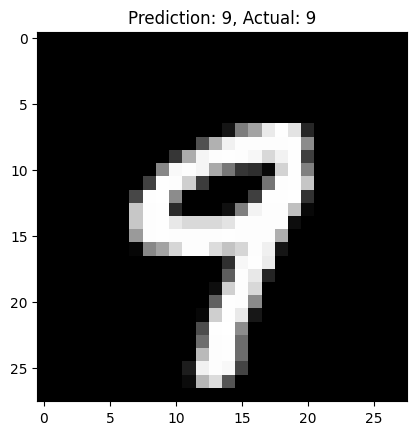

In [15]:
import random
import matplotlib.pyplot as plt

# pick a random index from test set
idx = random.randint(0, len(testset)-1)

image, label = testset[idx]           # get image and true label
output = model(image.unsqueeze(0))    # add batch dimension
_, predicted = torch.max(output, 1)   # get prediction

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Prediction: {predicted.item()}, Actual: {label}")
plt.show()
